<a href="https://colab.research.google.com/github/spacewal/Apriori-Algorithm/blob/main/module_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import matplotlib.pyplot as plt
import mlxtend.frequent_patterns
import mlxtend.preprocessing
import numpy
import pandas as pd
import re

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Part 1:
#Running the Apriori Algorithm on the Complete Online Retail Dataset
[Complete Online Retail Dataset](http://archive.ics.uci.edu/ml/datasets/online+retail)

In [4]:
df = pd.read_excel('/content/Online Retail.xlsx')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [7]:
print("Data dimension (row count, col count): {dim}".format(dim=df.shape))
print("Count of unique invoice numbers: {cnt}".format(cnt=df.InvoiceNo.nunique()))
print("Count of unique customer ids: {cnt}".format(cnt=df.CustomerID.nunique()))

Data dimension (row count, col count): (541909, 8)
Count of unique invoice numbers: 25900
Count of unique customer ids: 4372


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
# If there is a C in the invoice number then that means that it is a "refund"
# create new column called IsCPresent
df['IsCPresent'] = (
# looking for C in InvoiceNo column
    df['InvoiceNo']
# convert column to string type for the apply function below
    .astype(str)
# set element to 1 if C present otherwise 0, this will helpful for step 2
    .apply(lambda x: 1 if x.find('C') != -1 else 0)
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
# This is important, you are going to remove all values that are NOT positive, or are 0 or have a "C" in the invoice number.  How you do that is up to you!
# also important, make sure that you DROP any empties

# In order to do a MBA... there must be transactional data
# - transaction identifier (like a rcpt, invoice, tx number)
# - list of products associated with that identifier (in this case, it is invoice number and description)
online1 = (
    df
    # filter out non-positive quantity values
    .loc[df["Quantity"] > 0]
    # remove InvoiceNos starting with C
    .loc[df['IsCPresent'] != 1]
    # column filtering
    .loc[:, ["InvoiceNo", "Description"]]
    # dropping all rows with at least one missing value
    .dropna()
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
online1.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,Description
0,536365,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,WHITE METAL LANTERN
2,536365,CREAM CUPID HEARTS COAT HANGER
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,RED WOOLLY HOTTIE WHITE HEART.
5,536365,SET 7 BABUSHKA NESTING BOXES
6,536365,GLASS STAR FROSTED T-LIGHT HOLDER
7,536366,HAND WARMER UNION JACK
8,536366,HAND WARMER RED POLKA DOT
9,536367,ASSORTED COLOUR BIRD ORNAMENT


In [11]:
print("Data dimension (row count, col count): {dim}".format(dim=online1.shape))
print("Count of unique invoice numbers: {cnt}".format(cnt=online1.InvoiceNo.nunique()))

Data dimension (row count, col count): (530693, 2)
Count of unique invoice numbers: 20136


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
# extract unique invoice numbers as list
invoice_no_list = online1.InvoiceNo.tolist()
invoice_no_list = list(set(invoice_no_list))
print("Length of list of invoice numbers: {ln}".format(ln=len(invoice_no_list)))

Length of list of invoice numbers: 20136


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
# take subset of invoice number for exercises
subset_invoice_no_list = invoice_no_list[0:5000]
print("Length of subset list of invoice numbers: {ln}".format(ln=len(subset_invoice_no_list)))

Length of subset list of invoice numbers: 5000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
# filter data set down to based on
# subset of invoice number list
online1 = online1.loc[online1["InvoiceNo"].isin(subset_invoice_no_list)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
online1.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,Description
0,536365,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,WHITE METAL LANTERN
2,536365,CREAM CUPID HEARTS COAT HANGER
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,RED WOOLLY HOTTIE WHITE HEART.
5,536365,SET 7 BABUSHKA NESTING BOXES
6,536365,GLASS STAR FROSTED T-LIGHT HOLDER
7,536366,HAND WARMER UNION JACK
8,536366,HAND WARMER RED POLKA DOT
9,536367,ASSORTED COLOUR BIRD ORNAMENT


In [16]:
print("Data dimension (row count, col count): {dim}".format(dim=online1.shape))
print("Count of unique invoice numbers: {cnt}".format(cnt=online1.InvoiceNo.nunique()))

Data dimension (row count, col count): (133315, 2)
Count of unique invoice numbers: 5000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
invoice_item_list = []
for num in list(set(online1.InvoiceNo.tolist())):
    # filter data set down to one invoice number
    tmp_df = online1.loc[online1['InvoiceNo'] == num]
    # extract item descriptions and convert to list
    tmp_items = tmp_df.Description.tolist()
    # append list invoice_item_list
    invoice_item_list.append(tmp_items)

print(invoice_item_list[1:5])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT'], ['ASSORTED COLOUR BIRD ORNAMENT', "POPPY'S PLAYHOUSE BEDROOM ", "POPPY'S PLAYHOUSE KITCHEN", 'FELTCRAFT PRINCESS CHARLOTTE DOLL', 'IVORY KNITTED MUG COSY ', 'BOX OF 6 ASSORTED COLOUR TEASPOONS', 'BOX OF VINTAGE JIGSAW BLOCKS ', 'BOX OF VINTAGE ALPHABET BLOCKS', 'HOME BUILDING BLOCK WORD', 'LOVE BUILDING BLOCK WORD', 'RECIPE BOX WITH METAL HEART', 'DOORMAT NEW ENGLAND'], ['JAM MAKING SET WITH JARS', 'RED COAT RACK PARIS FASHION', 'YELLOW COAT RACK PARIS FASHION', 'BLUE COAT RACK PARIS FASHION'], ['BATH BUILDING BLOCK WORD']]


In [18]:
# At this point - this is a template... copy and paste...
online_encoder = mlxtend.preprocessing.TransactionEncoder()
online_encoder_array = online_encoder.fit_transform(invoice_item_list)
print(online_encoder_array)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
# Once you have above... simply encode it... copy and paste code!
online_encoder_df = pandas.DataFrame(
    online_encoder_array,
    columns=online_encoder.columns_
)

# this is a very big table, so for more
# easy viewing only a subset is printed
online_encoder_df.loc[
    4970:4979,
    online_encoder_df.columns.tolist()[0:8]
]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,4 PURPLE FLOCK DINNER CANDLES,OVAL WALL MIRROR DIAMANTE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS
4970,False,False,False,False,False,False,False,False
4971,False,False,False,False,False,False,False,False
4972,False,False,False,False,False,False,False,False
4973,False,False,True,False,False,False,False,False
4974,False,False,False,False,False,False,False,False
4975,False,False,False,False,False,False,False,False
4976,False,False,False,False,False,False,False,False
4977,False,False,False,False,False,False,False,False
4978,False,False,False,False,False,False,False,False
4979,False,False,False,False,False,False,False,False


In [20]:
print("Data dimension (row count, col count): {dim}".format(dim=online_encoder_df.shape))

Data dimension (row count, col count): (5000, 3135)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
# default minimum support = 0.5
# does not use colnames (item names)

mod = mlxtend.frequent_patterns.apriori(online_encoder_df)
mod

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets


In [22]:
mod_minsupport = mlxtend.frequent_patterns.apriori(
    online_encoder_df,
    min_support=0.05
)
mod_minsupport.loc[0:6]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.0530,(85)
1,0.0546,(118)
2,0.0520,(122)
3,0.0692,(187)
4,0.0504,(712)
5,0.0500,(877)
6,0.0574,(1281)


In [23]:
# add colnames for easier interpretability

mod_colnames_minsupport = mlxtend.frequent_patterns.apriori(
    online_encoder_df,
    min_support=0.01,
    use_colnames=True
)
mod_colnames_minsupport.loc[0:6]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.0110,( OVAL WALL MIRROR DIAMANTE )
1,0.0340,( SET 2 TEA TOWELS I LOVE LONDON )
2,0.0178,(10 COLOUR SPACEBOY PEN)
3,0.0126,(12 IVORY ROSE PEG PLACE SETTINGS)
4,0.0132,(12 MESSAGE CARDS WITH ENVELOPES)
5,0.0178,(12 PENCIL SMALL TUBE WOODLAND)
6,0.0276,(12 PENCILS SMALL TUBE RED RETROSPOT)


In [24]:
# Length is the number of items in the itemsets
mod_colnames_minsupport['length'] = (
    mod_colnames_minsupport['itemsets'].apply(lambda x: len(x))
)

mod_colnames_minsupport.loc[180:296]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
180,0.0208,(COFFEE MUG CAT + BIRD DESIGN),1
181,0.0142,(COFFEE MUG DOG + BALL DESIGN),1
182,0.0132,(COFFEE MUG PEARS DESIGN),1
183,0.0240,(COLOUR GLASS T-LIGHT HOLDER HANGING),1
184,0.0224,(COLOURING PENCILS BROWN TUBE),1
...,...,...,...
292,0.0134,(FRYING PAN UNION FLAG),1
293,0.0154,(FULL ENGLISH BREAKFAST PLATE),1
294,0.0148,(FUNKY WASHING UP GLOVES ASSORTED),1
295,0.0344,(GARLAND WOODEN HAPPY EASTER),1


In [25]:
mod_colnames_minsupport[
    mod_colnames_minsupport['itemsets'] == frozenset(
        {'10 COLOUR SPACEBOY PEN'}
    )
]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
2,0.0178,(10 COLOUR SPACEBOY PEN),1


In [26]:
## ORDER OF ITEMSETS DIFFERS

mod_colnames_minsupport[
    (mod_colnames_minsupport['length'] == 2) &
    (mod_colnames_minsupport['support'] >= 0.02) &
    (mod_colnames_minsupport['support'] < 0.021)
]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
889,0.0200,"(6 RIBBONS RUSTIC CHARM, REGENCY CAKESTAND 3 T...",2
950,0.0208,"(ALARM CLOCK BAKELIKE ORANGE, ALARM CLOCK BAKE...",2
1309,0.0200,"(DOTCOM POSTAGE, LUNCH BAG RED RETROSPOT)",2
1516,0.0208,"(SINGLE HEART ZINC T-LIGHT HOLDER, HANGING HEA...",2
1565,0.0206,"(JUMBO BAG RED RETROSPOT, HEART OF WICKER SMALL)",2
1640,0.0204,"(HOME BUILDING BLOCK WORD, WHITE HANGING HEART...",2
1753,0.0206,"(REGENCY CAKESTAND 3 TIER, JAM MAKING SET WITH...",2
1792,0.0206,"(JUMBO BAG PINK POLKADOT, JUMBO BAG OWLS)",2
1879,0.0208,"(JUMBO BAG RED RETROSPOT, RED RETROSPOT CHARLO...",2
1944,0.0204,"(JUMBO BAG WOODLAND ANIMALS, JUMBO STORAGE BAG...",2


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


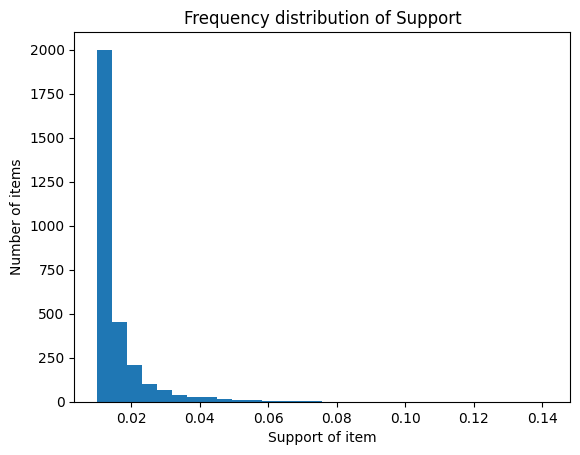

In [27]:
mod_colnames_minsupport.hist("support", grid=False, bins=30)
plt.xlabel("Support of item")
plt.ylabel("Number of items")
plt.title("Frequency distribution of Support")
plt.show()

# Part 2:
# Finding the Association Rules on the Complete Online Retail Dataset

In [28]:
## ROW ORDER SLIGHTLY DIFFERENT

rules = mlxtend.frequent_patterns.association_rules(
    mod_colnames_minsupport,
    metric="confidence",
    min_threshold=0.6,
    support_only=False
)

rules.loc[0:6]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(12 PENCILS SMALL TUBE SKULL),(12 PENCILS SMALL TUBE RED RETROSPOT),0.0222,0.0276,0.0152,0.684685,24.807416,0.014587,3.083897,0.981478
1,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE GREEN),0.0208,0.0546,0.0140,0.673077,12.327416,0.012864,2.891812,0.938399
2,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE RED ),0.0208,0.0520,0.0140,0.673077,12.943787,0.012918,2.899765,0.942344
3,(ALARM CLOCK BAKELIKE IVORY),(ALARM CLOCK BAKELIKE GREEN),0.0268,0.0546,0.0164,0.611940,11.207698,0.014937,2.436223,0.935857
4,(ALARM CLOCK BAKELIKE ORANGE),(ALARM CLOCK BAKELIKE GREEN),0.0278,0.0546,0.0208,0.748201,13.703323,0.019282,3.754589,0.953533
5,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.0546,0.0520,0.0358,0.655678,12.609186,0.032961,2.753234,0.973866
6,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.0520,0.0546,0.0358,0.688462,12.609186,0.032961,3.034617,0.971195


In [29]:
print("Number of Associations: {}".format(rules.shape[0]))

Number of Associations: 1064


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
## ORDER OF DF DIFFERENT SLIGHTLY

rules2 = mlxtend.frequent_patterns.association_rules(
    mod_colnames_minsupport,
    metric="lift",
    min_threshold=50,
    support_only=False
)

rules2.loc[0:6]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(BEADED CRYSTAL HEART PINK ON STICK),(BEADED CRYSTAL HEART GREEN ON STICK),0.0156,0.0126,0.0108,0.692308,54.945055,0.010603,3.209050,0.997359
1,(BEADED CRYSTAL HEART GREEN ON STICK),(BEADED CRYSTAL HEART PINK ON STICK),0.0126,0.0156,0.0108,0.857143,54.945055,0.010603,6.890800,0.994329
2,(CHRISTMAS TREE HEART DECORATION),(CHRISTMAS TREE DECORATION WITH BELL),0.0140,0.0140,0.0120,0.857143,61.224490,0.011804,6.902000,0.997634
3,(CHRISTMAS TREE DECORATION WITH BELL),(CHRISTMAS TREE HEART DECORATION),0.0140,0.0140,0.0120,0.857143,61.224490,0.011804,6.902000,0.997634
4,(CHRISTMAS TREE STAR DECORATION),(CHRISTMAS TREE DECORATION WITH BELL),0.0140,0.0140,0.0120,0.857143,61.224490,0.011804,6.902000,0.997634
5,(CHRISTMAS TREE DECORATION WITH BELL),(CHRISTMAS TREE STAR DECORATION),0.0140,0.0140,0.0120,0.857143,61.224490,0.011804,6.902000,0.997634
6,(CHRISTMAS TREE STAR DECORATION),(CHRISTMAS TREE HEART DECORATION),0.0140,0.0140,0.0122,0.871429,62.244898,0.012004,7.668889,0.997905


In [31]:
print("Number of Associations: {}".format(rules2.shape[0]))

Number of Associations: 170


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


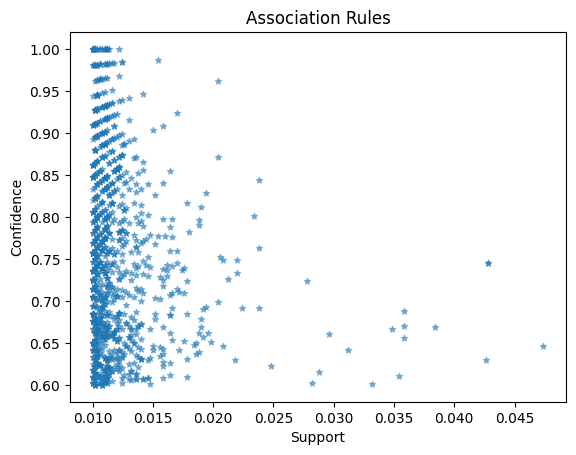

In [32]:
rules.plot.scatter("support", "confidence", alpha=0.5, marker="*")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Association Rules")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


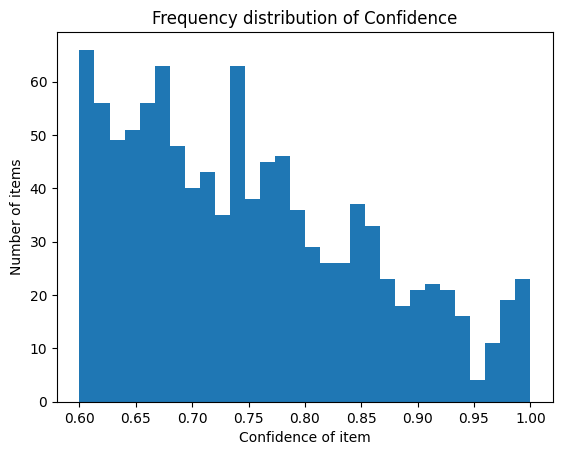

In [33]:
rules.hist("confidence", grid=False, bins=30)
plt.xlabel("Confidence of item")
plt.ylabel("Number of items")
plt.title("Frequency distribution of Confidence")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


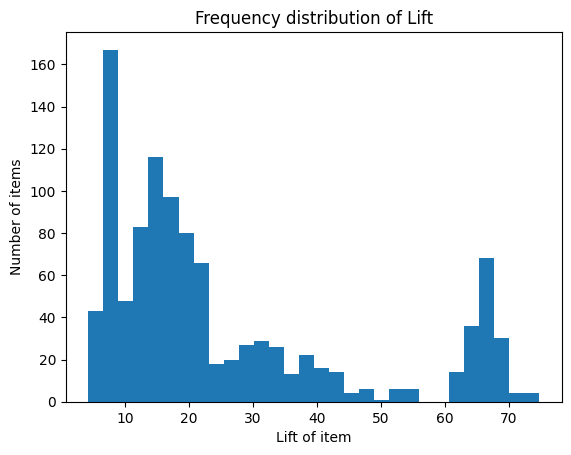

In [34]:
rules.hist("lift", grid=False, bins=30)
plt.xlabel("Lift of item")
plt.ylabel("Number of items")
plt.title("Frequency distribution of Lift")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


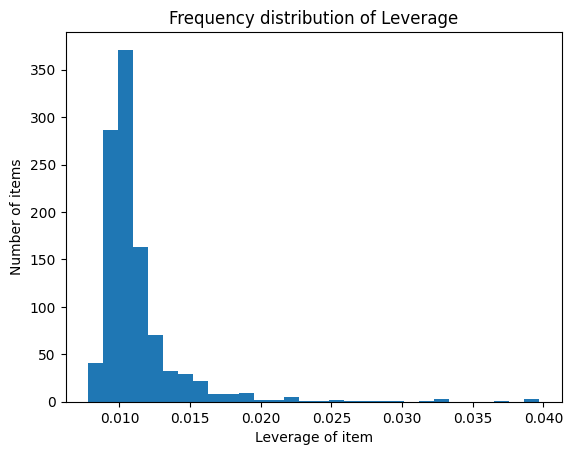

In [35]:
rules.hist("leverage", grid=False, bins=30)
plt.xlabel("Leverage of item")
plt.ylabel("Number of items")
plt.title("Frequency distribution of Leverage")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


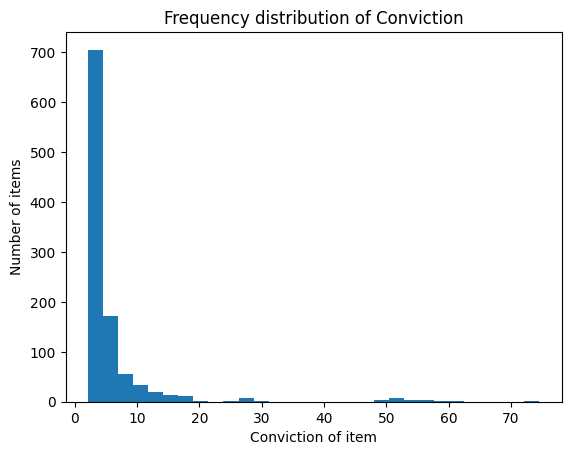

In [36]:
plt.hist(rules[numpy.isfinite(rules['conviction'])].conviction.values, bins = 30)
plt.xlabel("Conviction of item")
plt.ylabel("Number of items")
plt.title("Frequency distribution of Conviction")
plt.show()

# Part 3:
# Application to the Online Retail II Dataset
[Online Retail II Dataset](https://archive.ics.uci.edu/ml/datasets/Online+Retail+II)

In [37]:
df_2 = pd.read_excel('/content/online_retail_II.xlsx')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
df_2.tail(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country
525451,538171,22748,POPPY'S PLAYHOUSE KITCHEN,2,2010-12-09 20:01:00,2.10,17530.0,United Kingdom
525452,538171,22745,POPPY'S PLAYHOUSE BEDROOM,2,2010-12-09 20:01:00,2.10,17530.0,United Kingdom
525453,538171,22558,CLOTHES PEGS RETROSPOT PACK 24,4,2010-12-09 20:01:00,1.49,17530.0,United Kingdom
525454,538171,21671,RED SPOT CERAMIC DRAWER KNOB,6,2010-12-09 20:01:00,1.25,17530.0,United Kingdom
525455,538171,20971,PINK BLUE FELT CRAFT TRINKET BOX,2,2010-12-09 20:01:00,1.25,17530.0,United Kingdom
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


In [43]:
df_2.rename(columns={'Customer ID': 'Customer_ID'}, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
df_2.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer_ID           float64
Country                object
dtype: object

In [45]:
print("Data dimension (row count, col count): {dim}".format(dim=df_2.shape))
print("Count of unique invoice numbers: {cnt}".format(cnt=df_2.Invoice.nunique()))
print("Count of unique customer ids: {cnt}".format(cnt=df_2.Customer_ID.nunique()))

Data dimension (row count, col count): (525461, 8)
Count of unique invoice numbers: 28816
Count of unique customer ids: 4383


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
# Pattern to match any letter from A to Z (case insensitive)
pattern = r'[A-Za-z]'

df_2['IsLetterPresent'] = df_2['Invoice'].astype(str).str.contains(pattern).astype(int)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
df_2.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country,IsCPresent,IsLetterPresent
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,0,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0,0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0,0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,0,0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,0,0


In [51]:
# Removing all values that are not positive or are 0 or have a C in the invoice number

df_3 = (
    df_2.loc[df_2["Quantity"] > 0].loc[df_2['IsLetterPresent'] != 1].loc[:,["Invoice", "Description"]].dropna()
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
df_3.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Invoice,Description
0,489434,15CM CHRISTMAS GLASS BALL 20 LIGHTS
1,489434,PINK CHERRY LIGHTS
2,489434,WHITE CHERRY LIGHTS
3,489434,"RECORD FRAME 7"" SINGLE SIZE"
4,489434,STRAWBERRY CERAMIC TRINKET BOX


In [53]:
print("Data dimension (row count, col count): {dim}".format(dim=df_3.shape))
print("Count of unique invoice numbers: {cnt}".format(cnt=df_3.Invoice.nunique()))

Data dimension (row count, col count): (512030, 2)
Count of unique invoice numbers: 20999


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
invoice_no_list = df_3.Invoice.tolist()
invoice_no_list = list(set(invoice_no_list))
invoice_lenght = len(invoice_no_list)
print(f"List of invoice numbers has {invoice_lenght} records")

List of invoice numbers has 20999 records


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [66]:
df_3.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Invoice,Description
0,489434,15CM CHRISTMAS GLASS BALL 20 LIGHTS
1,489434,PINK CHERRY LIGHTS
2,489434,WHITE CHERRY LIGHTS
3,489434,"RECORD FRAME 7"" SINGLE SIZE"
4,489434,STRAWBERRY CERAMIC TRINKET BOX
5,489434,PINK DOUGHNUT TRINKET POT
6,489434,SAVE THE PLANET MUG
7,489434,FANCY FONT HOME SWEET HOME DOORMAT
8,489435,CAT BOWL
9,489435,"DOG BOWL , CHASING BALL DESIGN"


In [73]:
# take subset of invoice number for exercises
subset_invoice_no_list = invoice_no_list[0:5000]
print("Length of subset list of invoice numbers: {ln}".format(ln=len(subset_invoice_no_list)))

Length of subset list of invoice numbers: 5000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [75]:
# filter data set down to based on
# subset of invoice number list
df_3 = df_3.loc[df_3["Invoice"].isin(subset_invoice_no_list)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [77]:
df_3.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Invoice,Description
360051,524288,PHARMACIE FIRST AID TIN
360052,524288,TEA COSY VINTAGE UNION JACK
360053,524289,TOY TIDY SPACEBOY
360054,524289,TOY TIDY DOLLY GIRL DESIGN
360055,524289,TOY TIDY PINK RETROSPOT
360056,524289,RECYCLING BAG RETROSPOT
360057,524289,BOX OF VINTAGE ALPHABET BLOCKS
360058,524289,BOX OF VINTAGE JIGSAW BLOCKS
360059,524289,LUNCH BAG SPACEBOY DESIGN
360060,524289,LUNCH BAG DOLLY GIRL DESIGN


In [78]:
print("Data dimension (row count, col count): {dim}".format(dim=df_3.shape))
print("Count of unique invoice numbers: {cnt}".format(cnt=df_3.Invoice.nunique()))

Data dimension (row count, col count): (131045, 2)
Count of unique invoice numbers: 5000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [79]:
invoice_item_list = []
for num in list(set(df_3.Invoice.tolist())):
    # filter data set down to one invoice number
    tmp_df = df_3.loc[df_3['Invoice'] == num]
    # extract item descriptions and convert to list
    tmp_items = tmp_df.Description.tolist()
    # append list invoice_item_list
    invoice_item_list.append(tmp_items)

print(invoice_item_list[1:5])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['TOY TIDY SPACEBOY  ', 'TOY TIDY DOLLY GIRL DESIGN', 'TOY TIDY PINK RETROSPOT  ', 'RECYCLING BAG RETROSPOT ', 'BOX OF VINTAGE ALPHABET BLOCKS', 'BOX OF VINTAGE JIGSAW BLOCKS ', 'LUNCH BAG SPACEBOY DESIGN ', 'LUNCH BAG DOLLY GIRL DESIGN', 'LUNCH BAG CARS BLUE', 'LUNCH BAG SUKI  DESIGN ', 'CHILDS BREAKFAST SET DOLLY GIRL ', 'CHILDS BREAKFAST SET SPACEBOY ', 'BAKING SET SPACEBOY DESIGN', 'BAKING SET 9 PIECE RETROSPOT ', 'PLASTERS IN TIN SPACEBOY', 'PLASTERS IN TIN WOODLAND ANIMALS', 'VINTAGE HEADS AND TAILS CARD GAME ', 'VINTAGE SNAP CARDS'], ['NATURAL SLATE RECTANGLE CHALKBOARD', 'SLATE TILE NATURAL HANGING', 'NATURAL SLATE HEART CHALKBOARD ', 'BLUE POLKADOT WASHING UP GLOVES', 'RETROSPOT TEA SET CERAMIC 11 PC ', 'HEART OF WICKER LARGE', 'GIN AND TONIC MUG', 'WHITE JEWELLED HEART DECORATION', 'YELLOW METAL CHICKEN HEART ', 'ZINC FOLKART SLEIGH BELLS', 'HOT WATER BOTTLE TEA AND SYMPATHY', 'RED WOOLLY HOTTIE WHITE HEART.', 'PACK OF 12 PINK POLKADOT TISSUES', 'PACK OF 12 RED RETROSPOT TIS

In [81]:
# At this point - this is a template... copy and paste...
online_encoder = mlxtend.preprocessing.TransactionEncoder()
online_encoder_array = online_encoder.fit_transform(invoice_item_list)
print(online_encoder_array)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False  True ... False False False]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [82]:
# Once you have above... simply encode it... copy and paste code!
online_encoder_df = pandas.DataFrame(
    online_encoder_array,
    columns=online_encoder.columns_
)

# this is a very big table, so for more
# easy viewing only a subset is printed
online_encoder_df.loc[
    4970:4979,
    online_encoder_df.columns.tolist()[0:8]
]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,4 PURPLE FLOCK DINNER CANDLES,OVAL WALL MIRROR DIAMANTE,SET 2 TEA TOWELS I LOVE LONDON,10 COLOUR SPACEBOY PEN,12 ASS ZINC CHRISTMAS DECORATIONS,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD
4970,False,False,False,False,False,False,False,False
4971,False,False,False,False,False,False,False,False
4972,False,False,False,False,False,False,False,False
4973,False,False,False,False,False,False,False,False
4974,False,False,True,False,False,True,False,False
4975,False,False,False,False,False,False,False,False
4976,False,False,False,False,False,False,False,False
4977,False,False,True,False,False,False,False,False
4978,False,False,False,False,False,False,False,False
4979,False,False,False,False,False,False,False,False


In [83]:
print("Data dimension (row count, col count): {dim}".format(dim=online_encoder_df.shape))

Data dimension (row count, col count): (5000, 3333)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [84]:
# default minimum support = 0.5
# does not use colnames (item names)

mod = mlxtend.frequent_patterns.apriori(online_encoder_df)
mod

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets


In [85]:
mod_minsupport = mlxtend.frequent_patterns.apriori(
    online_encoder_df,
    min_support=0.05
)
mod_minsupport.loc[0:6]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.0544,(88)
1,0.0730,(92)
2,0.0512,(94)
3,0.0506,(123)
4,0.0564,(127)
5,0.0542,(168)
6,0.0744,(191)


In [86]:
# add colnames for easier interpretability

mod_colnames_minsupport = mlxtend.frequent_patterns.apriori(
    online_encoder_df,
    min_support=0.01,
    use_colnames=True
)
mod_colnames_minsupport.loc[0:6]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.0328,( SET 2 TEA TOWELS I LOVE LONDON )
1,0.0236,(10 COLOUR SPACEBOY PEN)
2,0.0324,(12 MESSAGE CARDS WITH ENVELOPES)
3,0.0260,(12 PENCIL SMALL TUBE WOODLAND)
4,0.0320,(12 PENCILS SMALL TUBE RED RETROSPOT)
5,0.0318,(12 PENCILS SMALL TUBE SKULL)
6,0.0206,(12 PENCILS TALL TUBE RED RETROSPOT)


In [87]:
# Length is the number of items in the itemsets
mod_colnames_minsupport['length'] = (
    mod_colnames_minsupport['itemsets'].apply(lambda x: len(x))
)

mod_colnames_minsupport.loc[180:296]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
180,0.0146,(COLOURING PENCILS BROWN TUBE),1
181,0.0422,(COOK WITH WINE METAL SIGN ),1
182,0.0156,(COOKING SET RETROSPOT),1
183,0.0154,(CORONA MEXICAN TRAY),1
184,0.0236,(COSY HOUR CIGAR BOX MATCHES ),1
...,...,...,...
292,0.0368,(GREEN REGENCY TEACUP AND SAUCER),1
293,0.0156,(GREY FLORAL FELTCRAFT SHOULDER BAG),1
294,0.0528,(GREY HEART HOT WATER BOTTLE),1
295,0.0118,(GROW YOUR OWN BASIL IN ENAMEL MUG),1


In [88]:
mod_colnames_minsupport[
    mod_colnames_minsupport['itemsets'] == frozenset(
        {'10 COLOUR SPACEBOY PEN'}
    )
]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
1,0.0236,(10 COLOUR SPACEBOY PEN),1


In [89]:
## ORDER OF ITEMSETS DIFFERS

mod_colnames_minsupport[
    (mod_colnames_minsupport['length'] == 2) &
    (mod_colnames_minsupport['support'] >= 0.02) &
    (mod_colnames_minsupport['support'] < 0.021)
]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
807,0.0204,"(12 PENCILS SMALL TUBE RED RETROSPOT, 12 PENCI...",2
886,0.0200,"(HAND WARMER BIRD DESIGN, 60 CAKE CASES VINTAG...",2
971,0.0204,"(PACK OF 72 RETROSPOT CAKE CASES, 72 SWEETHEAR...",2
987,0.0200,"(ALARM CLOCK BAKELIKE ORANGE, ALARM CLOCK BAKE...",2
1037,0.0206,"(ASSORTED COLOUR BIRD ORNAMENT, PAINTED METAL ...",2
1227,0.0208,"(CHRISTMAS GINGHAM TREE, CHRISTMAS GINGHAM STAR)",2
1293,0.0202,"(CHRISTMAS TOILET ROLL, PAPER CHAIN KIT VINTAG...",2
1334,0.0206,"(COOK WITH WINE METAL SIGN , PLEASE ONE PERSON...",2
1414,0.0202,"(FELTCRAFT CUSHION OWL, FELTCRAFT CUSHION BUTT...",2
1465,0.0204,"(HAND WARMER BABUSHKA DESIGN, HAND WARMER BIRD...",2


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


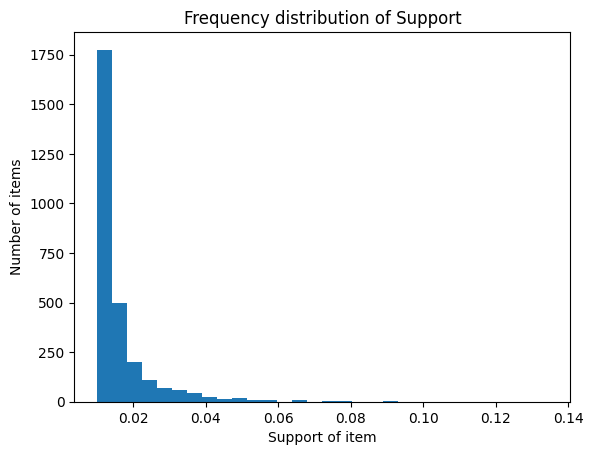

In [90]:
mod_colnames_minsupport.hist("support", grid=False, bins=30)
plt.xlabel("Support of item")
plt.ylabel("Number of items")
plt.title("Frequency distribution of Support")
plt.show()

In [91]:
## ROW ORDER SLIGHTLY DIFFERENT

rules = mlxtend.frequent_patterns.association_rules(
    mod_colnames_minsupport,
    metric="confidence",
    min_threshold=0.6,
    support_only=False
)

rules.loc[0:6]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(12 PENCILS SMALL TUBE RED RETROSPOT),(12 PENCILS SMALL TUBE SKULL),0.0320,0.0318,0.0204,0.637500,20.047170,0.019382,2.670897,0.981526
1,(12 PENCILS SMALL TUBE SKULL),(12 PENCILS SMALL TUBE RED RETROSPOT),0.0318,0.0320,0.0204,0.641509,20.047170,0.019382,2.700211,0.981324
2,(36 DOILIES VINTAGE CHRISTMAS),(PAPER CHAIN KIT VINTAGE CHRISTMAS),0.0216,0.0962,0.0130,0.601852,6.256256,0.010922,2.270009,0.858708
3,(36 DOILIES VINTAGE CHRISTMAS),(SET OF 20 VINTAGE CHRISTMAS NAPKINS),0.0216,0.0768,0.0140,0.648148,8.439429,0.012341,2.623832,0.900970
4,(SET OF 36 TEATIME PAPER DOILIES),(60 TEATIME FAIRY CAKE CASES),0.0206,0.0512,0.0126,0.611650,11.946299,0.011545,2.443160,0.935565
5,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE GREEN),0.0226,0.0506,0.0138,0.610619,12.067578,0.012656,2.438232,0.938340
6,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE RED ),0.0226,0.0564,0.0162,0.716814,12.709471,0.014925,3.332088,0.942622


In [92]:
print("Number of Associations: {}".format(rules.shape[0]))

Number of Associations: 831


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [93]:
## ORDER OF DF DIFFERENT SLIGHTLY

rules2 = mlxtend.frequent_patterns.association_rules(
    mod_colnames_minsupport,
    metric="lift",
    min_threshold=50,
    support_only=False
)

rules2.loc[0:6]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(BLUE POLKADOT CUP),(PINK POLKADOT CUP),0.0140,0.0138,0.0100,0.714286,51.759834,0.009807,3.451700,0.994604
1,(PINK POLKADOT CUP),(BLUE POLKADOT CUP),0.0138,0.0140,0.0100,0.724638,51.759834,0.009807,3.580737,0.994403
2,"(CHRISTMAS TREE HEART DECORATION, CHRISTMAS TR...",(CHRISTMAS TREE STAR DECORATION),0.0144,0.0174,0.0132,0.916667,52.681992,0.012949,11.791200,0.995351
3,(CHRISTMAS TREE STAR DECORATION),"(CHRISTMAS TREE HEART DECORATION, CHRISTMAS TR...",0.0174,0.0144,0.0132,0.758621,52.681992,0.012949,4.083200,0.998390
4,"(SET OF 20 VINTAGE CHRISTMAS NAPKINS, CHRISTMA...",(CHRISTMAS TREE DECORATION WITH BELL),0.0112,0.0182,0.0106,0.946429,52.001570,0.010396,18.326933,0.991879
5,(CHRISTMAS TREE DECORATION WITH BELL),"(SET OF 20 VINTAGE CHRISTMAS NAPKINS, CHRISTMA...",0.0182,0.0112,0.0106,0.582418,52.001570,0.010396,2.367916,0.998951
6,"(CHRISTMAS TREE STAR DECORATION, PAPER CHAIN K...",(CHRISTMAS TREE DECORATION WITH BELL),0.0106,0.0182,0.0100,0.943396,51.834957,0.009807,17.345133,0.991215


In [94]:
print("Number of Associations: {}".format(rules2.shape[0]))

Number of Associations: 14


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


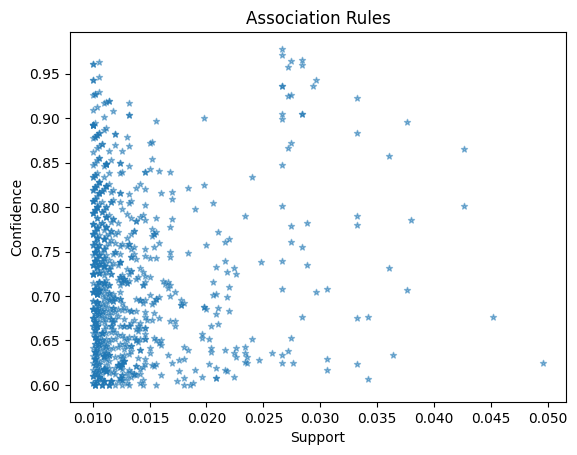

In [95]:
rules.plot.scatter("support", "confidence", alpha=0.5, marker="*")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Association Rules")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


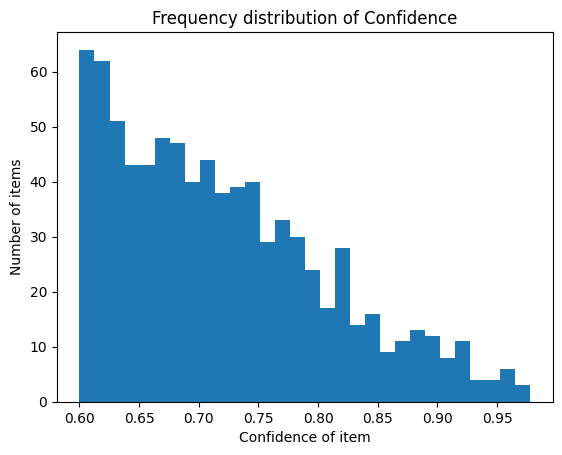

In [96]:
rules.hist("confidence", grid=False, bins=30)
plt.xlabel("Confidence of item")
plt.ylabel("Number of items")
plt.title("Frequency distribution of Confidence")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


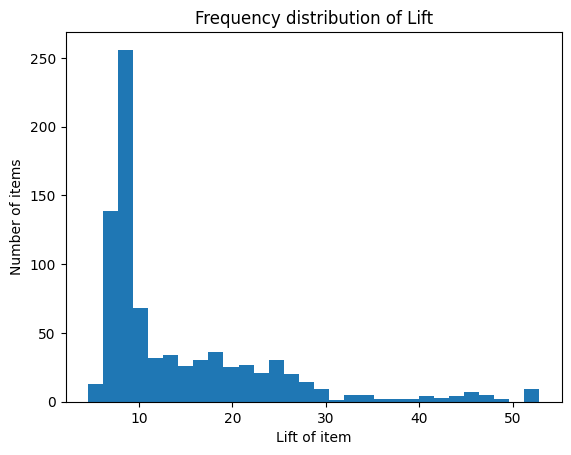

In [97]:
rules.hist("lift", grid=False, bins=30)
plt.xlabel("Lift of item")
plt.ylabel("Number of items")
plt.title("Frequency distribution of Lift")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


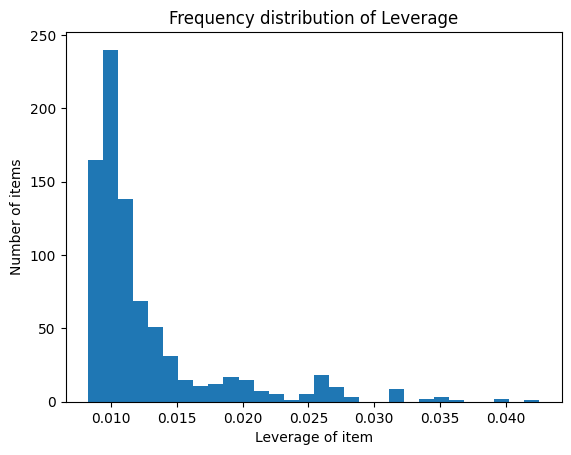

In [98]:
rules.hist("leverage", grid=False, bins=30)
plt.xlabel("Leverage of item")
plt.ylabel("Number of items")
plt.title("Frequency distribution of Leverage")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


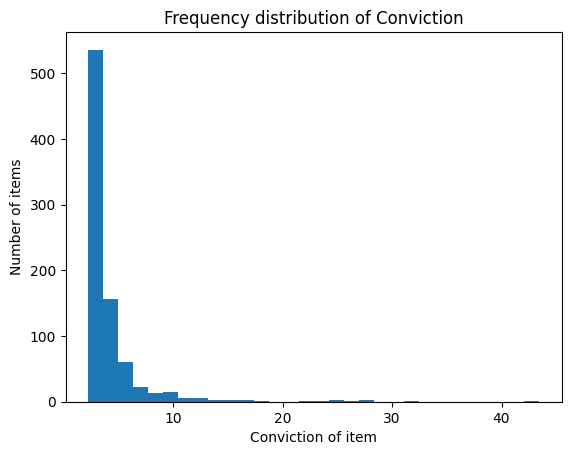

In [99]:
plt.hist(rules[numpy.isfinite(rules['conviction'])].conviction.values, bins = 30)
plt.xlabel("Conviction of item")
plt.ylabel("Number of items")
plt.title("Frequency distribution of Conviction")
plt.show()